## Data 3500: Data Dive 2

**Goals and Main Questions:** 

Explain how insights could be helpful to company/client in simple terms

Present fully functioning code with proper comments throughout

Question 1: What breed is associated with the highest number of reported dog bites?

Question 2: Does the gender or neuter status of the dog have a significant impact on the likelihood of dog bites?

Question 3: Which boroughs experience the highest number of dog bites?

Question 4: During which months do dog bites occur most frequently?

Question 5: Are there any trends in the number of dog bites across different years?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#widen screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Data Exploration

In [2]:
#import the data
data = pd.read_csv('Dog_Bites_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [3]:
print(data)

       UniqueID        DateOfBite Species                 Breed  Age Gender  \
0             1   January 01 2018     DOG               UNKNOWN  NaN      U   
1             2   January 04 2018     DOG               UNKNOWN  NaN      U   
2             3   January 06 2018     DOG              Pit Bull  NaN      U   
3             4   January 08 2018     DOG           Mixed/Other    4      M   
4             5   January 09 2018     DOG              Pit Bull  NaN      U   
...         ...               ...     ...                   ...  ...    ...   
22658     10276  December 24 2017     DOG         CHIWEENIE MIX    7      M   
22659     10277  December 24 2017     DOG                DUNKER    5      F   
22660     10278  December 21 2017     DOG  Schnauzer, Miniature  10M      M   
22661     10279  December 28 2017     DOG           Mixed/Other  NaN      F   
22662     10280  December 29 2017     DOG        BOXER/PIT BULL  NaN      M   

       SpayNeuter        Borough ZipCode  
0       

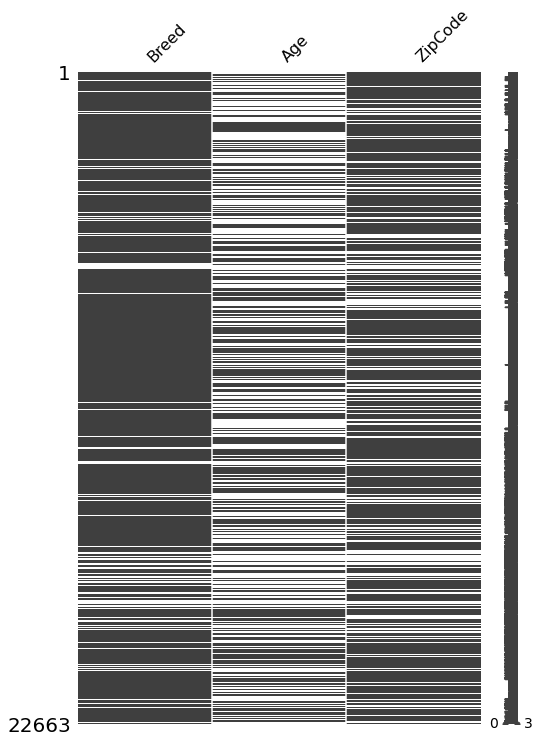

In [4]:
#matrix of missing values for only variables with missing data
msno.matrix(data[data.columns[data.isnull().any()]], figsize=(8, 12))
plt.show()

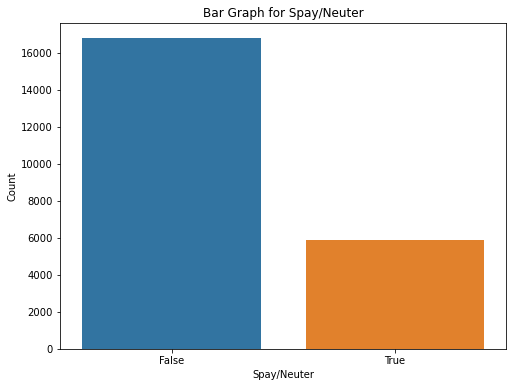

In [5]:
#Bar Graph for SpayNeuter
plt.figure(figsize=(8, 6))
sns.countplot(x='SpayNeuter', data=data)
plt.title('Bar Graph for Spay/Neuter')
plt.xlabel('Spay/Neuter')
plt.ylabel('Count')
plt.show()

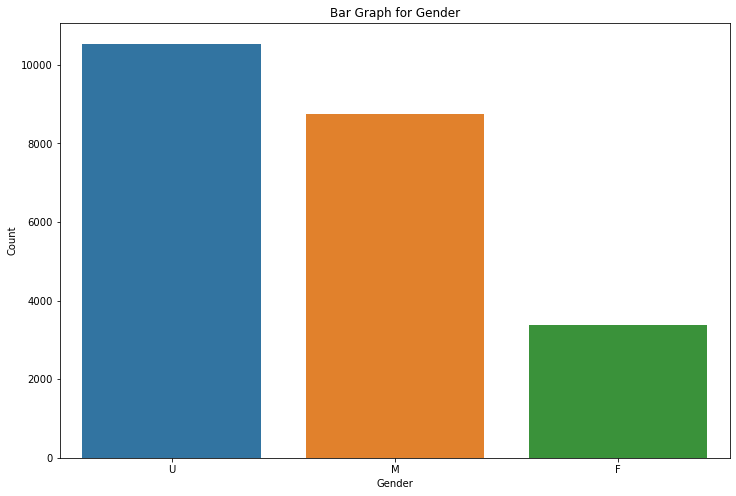

In [6]:
#Bar Graph for Gender
plt.figure(figsize=(12, 8))
sns.countplot(x='Gender', data=data)
plt.title('Bar Graph for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

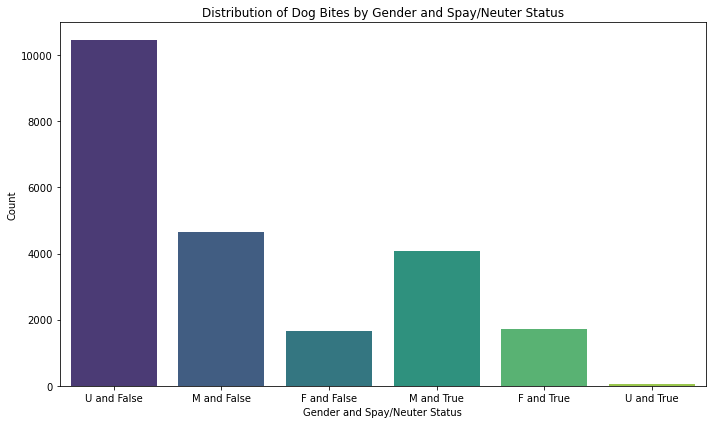

In [7]:
data['Combined'] = data['Gender'] + ' and ' + data['SpayNeuter'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Combined', palette='viridis')
plt.xlabel('Gender and Spay/Neuter Status')
plt.ylabel('Count')
plt.title('Distribution of Dog Bites by Gender and Spay/Neuter Status')
plt.tight_layout()
plt.show()

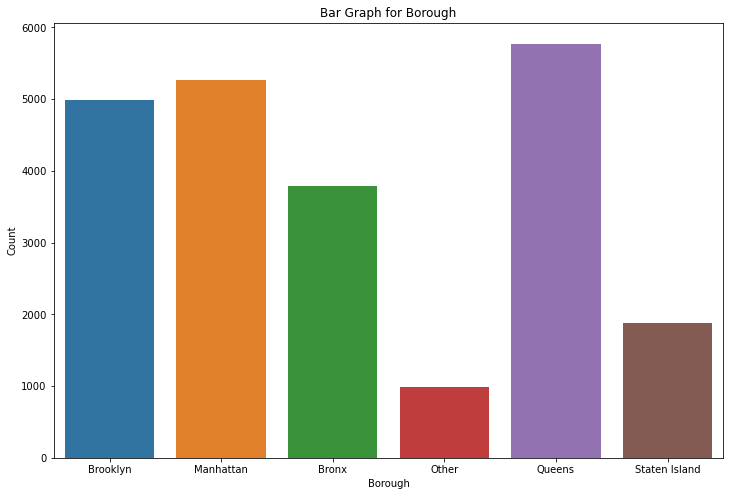

In [8]:
#bar graph for Borough
plt.figure(figsize=(12, 8))
sns.countplot(x='Borough', data=data)
plt.title('Bar Graph for Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [9]:
#removing unnecessary variables: UniqueID, Species, and ZipCode
#also dropping Age because it has so many missing values
columns_to_drop = ['UniqueID', 'Species', 'ZipCode', 'Age']
data = data.drop(columns=columns_to_drop)

In [10]:
#fill missing dog breeds with 'UNKNOWN'
data['Breed'] = data['Breed'].fillna('UNKNOWN')

In [11]:
#counting the number of times each breed comes up
breed_counts = data['Breed'].value_counts()

pd.set_option('display.max_rows', None) #increase display option
print(breed_counts)
pd.reset_option('display.max_rows')  #reset display option to default

UNKNOWN                                              4567
Pit Bull                                             4004
Shih Tzu                                              731
Chihuahua                                             646
German Shepherd                                       622
Mixed/Other                                           559
American Pit Bull Mix / Pit Bull Mix                  520
American Pit Bull Terrier/Pit Bull                    511
Yorkshire Terrier                                     480
MIXED BREED                                           388
Maltese                                               371
MIXED                                                 351
Rottweiler                                            316
Siberian Husky                                        303
Labrador Retriever                                    282
Poodle, Standard                                      264
Bull dog                                              220
Jack Russ     

In [12]:
#counting number of breeds with one instance
breeds_with_one_instance = breed_counts[breed_counts == 1]
print(breeds_with_one_instance.shape[0])

1186


In [13]:
#identify values with count greater than 1
breeds_to_keep = breed_counts[breed_counts > 1].index

#filtering those breeds and removing one instance breeds
data = data[data['Breed'].isin(breeds_to_keep)]

In [14]:
#now how many breeds do we have?
print(breeds_to_keep.shape[0])

465


In [15]:
#combining the unknown breeds with no size reference, small mix, med mix, and large mix
#combining mixes - whichever breed in a mix is mentioned first is where I added it
#also combining like breeds that are just entered different
breed_mapping = {
    'MIXED BREED': 'UNKNOWN', 
    'MIXED': 'UNKNOWN',
    'MUTT': 'UNKNOWN',
    'UNSURE': 'UNKNOWN',
    'REFUSED TO PROVIDE': 'UNKNOWN',
    'MIX BREED': 'UNKNOWN',
    'UKNOWN': 'UNKNOWN',
    'MUTT MIX': 'UNKNOWN',
    'UNKNOWN 2 DOGS': 'UNKNOWN',
    'UNKOWN': 'UNKNOWN',
    'Mixed/Other': 'UNKNOWN',
    'UNCERTAIN': 'UNKNOWN',
    'MIXED BREED DOG': 'UNKNOWN',
    'MUTT X': 'UNKNOWN',
    
    'SMALL DOG': 'SMALL MIXED BREED',
    'SMALL MIX BREED': 'SMALL MIXED BREED',
    'SMALL MIXED': 'SMALL MIXED BREED',
    'SMALL': 'SMALL MIXED BREED',
    'SMALL MIXDED DOG': 'SMALL MIXED BREED',
    
    'MEDIUM SIZE DOG': 'MEDIUM MIXED BREED',
    'MEDIUM SIZE BREED': 'MEDIUM MIXED BREED',
    'MEDIUM SIZE MIX': 'MEDIUM MIXED BREED',
    
    'LARGE MIX BREED': 'LARGE MIXED BREED',
    'LARGE MIX DOG': 'LARGE MIXED BREED',
    
    'PIT BULL TERRIER': 'Pit Bull',
    'PIT BULL BLUE NOSE': 'Pit Bull',
    'BLUE NOSE PIT BULL': 'Pit Bull',
    'American Pit Bull Terrier/Pit Bull': 'Pit Bull',
    'PIT BULL': 'Pit Bull',
    'PITBULL': 'Pit Bull',
    'RED NOSE PIT BULL': 'Pit Bull',
    
    'American Pit Bull Mix / Pit Bull Mix': 'PIT BULL MIX',
    'PIT BULL / GERMAN SHEPHERD MIX': 'PIT BULL MIX',
    'PIT BULL / RETRIEVER MIX': 'PIT BULL MIX',
    'PIT BULL / BULLY MIX': 'PIT BULL MIX',
    'PIT BULL / BOXER MIX': 'PIT BULL MIX',
    'PIT BULL/BOXER X': 'PIT BULL MIX',
    'PIT BULL / LABRADOR MIX': 'PIT BULL MIX',
    'PIT BULL / SHEPHERD MIX': 'PIT BULL MIX',
    'PIT BULL / CHIHUAHUA MIX': 'PIT BULL MIX',
    'PIT BULL / ROTTWEILER MIX': 'PIT BULL MIX',
    'PIT BULL TER/ALASKAN HUSKY': 'PIT BULL MIX',
    'PIT BULL MIXED': 'PIT BULL MIX',
    'PITBULL MIX': 'PIT BULL MIX',
    'PIT BULL/LAB X': 'PIT BULL MIX',
    'PIT BULL X': 'PIT BULL MIX',
    'PITBULL/BOXER': 'PIT BULL MIX',
    'MIXED BREED / PIT BULL': 'PIT BULL MIX',
    'BULL / PIT BULL MIX': 'PIT BULL MIX',
    'PIT BULL/BOXER MIX': 'PIT BULL MIX',
    'PITBULL TERRIER MIX': 'PIT BULL MIX',
    'PITBULL/LABRADOR': 'PIT BULL MIX',
    'PITBULL/LAB MIX': 'PIT BULL MIX',
    'PITBULL/BOXER MIX': 'PIT BULL MIX',
    'PIT BULL/BOXER': 'PIT BULL MIX',
    'PITBULL/LABRADOR MIX': 'PIT BULL MIX',
    'PIT BULL TERRIER MIX': 'PIT BULL MIX',
    
    'LABRADOR': 'Labrador Retriever',
    
    'Labrador Retriever Crossbreed': 'LABRADOR MIX',
    'Labradoodle': 'LABRADOR MIX',
    'LABRADOR / PIT BULL MIX': 'LABRADOR MIX',
    'LABRADOR RETRIEVER MIX': 'LABRADOR MIX',
    'LABRADOR / SHEPHERD MIX': 'LABRADOR MIX',
    'LABRADOR/PIT BULL X': 'LABRADOR MIX',
    'LABRADOR / HOUND MIX': 'LABRADOR MIX',
    'LABRADOR/PITBULL': 'LABRADOR MIX',
    'LAB/PIT BULL X': 'LABRADOR MIX',
    'LABRADOODLE': 'LABRADOR MIX',
    'LABRADOR/ PIT-BULL': 'LABRADOR MIX',
    'MIXED LAB DOG': 'LABRADOR MIX',
    'LABRADOR / PIT BULL': 'LABRADOR MIX',
    'LAB MIX': 'LABRADOR MIX',
    'LAB / PIT BULL MIX': 'LABRADOR MIX',
    'LAB/PIT BULL MIX': 'LABRADOR MIX',
    'LABRADOR-SHEEP DOG X': 'LABRADOR MIX',
    
    'SHIH TZU X': 'SHIH TZU MIX',
    'SHIH TZU / POODLE MIX': 'SHIH TZU MIX',
    'SHIH TZU / YORKIE MIX': 'SHIH TZU MIX',
    'SHIH TZU / MALTESE MIX': 'SHIH TZU MIX',
    'SHIH TZU/MALTESE X': 'SHIH TZU MIX',
    'SHIHTZU MIX': 'SHIH TZU MIX',
    'SHIH TZU/POODLE': 'SHIH TZU MIX',
    'SHIH TZU / CHIHUAHUA MIX': 'SHIH TZU MIX',
    'SHIH TZU / MALTESE': 'SHIH TZU MIX',
    'SHIH TZU/ POODLE': 'SHIH TZU MIX',
    'SHIH TZU/ YORKIE': 'SHIH TZU MIX',
    'SHIH TZU/ MALTESE': 'SHIH TZU MIX',
    'SHIHTZU/MALTESE MIX': 'SHIH TZU MIX',
    'SHIHTZU-POODLE MIX': 'SHIH TZU MIX',
    
    'GERMAN SHEPHERD': 'German Shepherd',
    
    'Chihuahua Crossbreed': 'CHIHUAHUA MIX',
    'CHIHUAHUA / POMERANIAN MIX': 'CHIHUAHUA MIX',
    'CHIHUAHUA / PUG MIX': 'CHIHUAHUA MIX',
    'CHIHUAHUA/JACK RUSS': 'CHIHUAHUA MIX',
    'CHIHUAHUA/TERRIER': 'CHIHUAHUA MIX',
    'CHIHUAHUA / SHIH TZU MIX': 'CHIHUAHUA MIX',
    'CHIHUAHUA X': 'CHIHUAHUA MIX',
    
    'BORDER COLLIE X': 'BORDER COLLIE MIX',
    'BORDER COLLIE/LAB': 'BORDER COLLIE MIX',
    'BORDER COLLIE / LABRADOR MIX': 'BORDER COLLIE MIX',
    
    'German Shepherd Crossbreed': 'SHEPHERD MIX',
    'SHEPERD': 'SHEPHERD MIX',
    'SHEPHERD': 'SHEPHERD MIX',
    'GERMAN SHEPHERD MIX': 'SHEPHERD MIX',
    'SHEPARD': 'SHEPHERD MIX',
    'SHEPHERD / PIT BULL MIX': 'SHEPHERD MIX',
    'SHEPHERD X': 'SHEPHERD MIX',
    'SHEPARD MIX': 'SHEPHERD MIX',
    'GERMAN SHEPARD MIX': 'SHEPHERD MIX',
    'SHEPHERD / HUSKY MIX': 'SHEPHERD MIX',
    'SHEPHERD / LABRADOR MIX': 'SHEPHERD MIX',
    'SHEPARD X': 'SHEPHERD MIX',
    'SHEPHERD/PIT BULL X': 'SHEPHERD MIX',
    'GERMAN SHEPERD/PITBULL': 'SHEPHERD MIX',
    
    'Collie, Rough Coat': 'COLLIE',
    'Collie, Smooth Coat': 'COLLIE',
    'Collie, Bearded': 'COLLIE',
    
    'Collie Crossbreed': 'COLLIE MIX',
    
    'Siberian Husky': 'HUSKY',
    'ALASKAN HUSKY': 'HUSKY',
    
    'HUSKY X': 'HUSKY MIX',
    'SIBERIAN HUSKY MIX': 'HUSKY MIX',
    'HUSKY / LABRADOR MIX': 'HUSKY MIX',
    
    'Dachshund Smooth Coat': 'DACHSHUND',
    'Dachshund Smooth Coat Miniature': 'DACHSHUND',
    'Dachshund, Long Haired': 'DACHSHUND',
    'DASCHOUND': 'DACHSHUND',
    'Dachshund, Wirehaired, Miniature': 'DACHSHUND',
    'Dachshund, Long Haired Miniature': 'DACHSHUND',
    'Dachshund, Wirehaired': 'DACHSHUND',
    
    'DACHSHUND X': 'DACHSHUND MIX',
    'DACHSHUND/JACK RUSS TERRIER': 'DACHSHUND MIX',
    'DACHSUND MIX': 'DACHSHUND MIX',
    
    'Yorkshire Terrier': 'YORKIE',
    'YORKSHIRE TERRIER': 'YORKIE',
    
    'Yorkshire Terrier Crossbreed': 'YORKIE MIX',
    'YORKIE / POODLE MIX': 'YORKIE MIX',
    'YORKIPOO': 'YORKIE MIX',
    'YORKIE / SHIH TZU MIX': 'YORKIE MIX',
    'YORKIE / CHIHUAHUA MIX': 'YORKIE MIX',
    'YORKIE/TERRIER MIX': 'YORKIE MIX',
    'YORKIE / SHIH TZU': 'YORKIE MIX',
    'YORKIE/MALTESE X': 'YORKIE MIX',
    
    'MALTESE': 'Maltese',
    
    'MALTIPOO': 'MALTESE MIX',
    'MALTESE / POODLE MIX': 'MALTESE MIX',
    'MALTESE X': 'MALTESE MIX',
    'MALTESE / SHIH TZU MIX': 'MALTESE MIX',
    'MALTIPOO MIX': 'MALTESE MIX',
    'MALTESE / YORKSHIRE MIX': 'MALTESE MIX',
    'MALTESE / POODLE': 'MALTESE MIX',
    'MALTESE / YORKIE MIX': 'MALTESE MIX',
    'MALTESE/POODLE': 'MALTESE MIX',
    'MULTI POO': 'MALTESE MIX',
    'MALTESE/SHIH TZU X': 'MALTESE MIX',
    'MALTESE/YORKSHIRE TERRIER': 'MALTESE MIX',
    'MALTESE/SHIH TZU MIX': 'MALTESE MIX',
    'MALTESE POODLE MIX': 'MALTESE MIX',
    'MALTESE/YORKIE': 'MALTESE MIX',
    
    'ROTTWEILER X': 'ROTTWEILER MIX',
    'ROTTWEILER / PIT BULL MIX': 'ROTTWEILER MIX',
    'ROTTWEILER/PIT BULL X': 'ROTTWEILER MIX',
    'ROTTWEILER / SHEPHERD MIX': 'ROTTWEILER MIX',
    
    'BOXER': 'Boxer',
    
    'BOXER X': 'BOXER MIX',
    'BOXER / PIT BULL MIX': 'BOXER MIX',
    'BOXER/PIT BULL': 'BOXER MIX',
    'BOXER / PIT BULL': 'BOXER MIX',
    
    'Poodle, Standard': 'POODLE',
    'Poodle, Miniature': 'POODLE',
    'Poodle, Toy': 'POODLE',
    'FRENCH POODLE': 'POODLE',
    
    'POODLE X': 'POODLE MIX',
    'POODLE / SHIH TZU MIX': 'POODLE MIX',
    'POODLE/SCHNAUZER': 'POODLE MIX',
    'POODLE/MALTESE': 'POODLE MIX',
    'POODLE/SHIH TZU': 'POODLE MIX',
    
    'AMERICAN BULLY': 'BULLY',
    'POCKET BULLY': 'BULLY',
    
    'AMERICAN BULLY / PIT BULL': 'Bully Mix',
    'BULLY PIT BULL X': 'Bully Mix',
    
    'POMSKY': 'POMERANIAN MIX',
    'POMERANIAN / POODLE MIX': 'POMERANIAN MIX',
    'POMERANIAN / CHIHUAHUA MIX': 'POMERANIAN MIX',
    'POMSKI': 'POMERANIAN MIX',
    'POMERANIAN X': 'POMERANIAN MIX',
    'POMERANIAN / MALTESE MIX': 'POMERANIAN MIX',
    'POMERANIAN/HUSKY MIX': 'POMERANIAN MIX',
    
    'JACK RUSSELL X': 'JACK RUSSELL MIX',
    'JACK RUSS / SHIH TZU MIX': 'JACK RUSSELL MIX',
    'JACK RUSSELL TERRIER MIX': 'JACK RUSSELL MIX',
    'JACK RUSSELL TERRIER': 'JACK RUSSELL MIX',
    'JACK RUSSELL/CHIHUAHUA X': 'JACK RUSSELL MIX',
    'JACK RUSS-X': 'JACK RUSSELL MIX',
    'JACK RUSS MIX': 'JACK RUSSELL MIX',
    
    'Cocker Spaniel, American': 'Cocker Spaniel',
    'English Cocker Spaniel': 'Cocker Spaniel',
    'ENGLISH COCKER SPANIEL': 'Cocker Spaniel',
    
    'Cock-A-Poo': 'Cocker Spaniel Crossbreed',
    'COCKAPOO': 'Cocker Spaniel Crossbreed',
    'COCKAPOO MIX': 'Cocker Spaniel Crossbreed',
    'COCKER SPANIEL / POODLE MIX': 'Cocker Spaniel Crossbreed',
    
    'BEAGLE': 'Beagle',
    
    'Beagle Crossbreed': 'BEAGLE MIX',
    'BEAGLE MIXED': 'BEAGLE MIX',
    'BEAGLE / SHAR-PEI MIX': 'BEAGLE MIX',
    'BEAGLE/BULLDOG': 'BEAGLE MIX',
    'BEAGLE / HOUND MIX': 'BEAGLE MIX',
    'BEAGLE / CHIHUAHUA MIX': 'BEAGLE MIX',
    
    'GOLDEN RETRIEVER MIX': 'RETRIEVER MIX',
    'RETRIEVER': 'RETRIEVER MIX',
    'RETRIEVER X': 'RETRIEVER MIX',
    'RETREIVER': 'RETRIEVER MIX',
    'RETRIEVER/LAB X': 'RETRIEVER MIX',
    
    'Mastiff, Bull': 'MASTIFF',
    'Mastiff, Old English': 'MASTIFF',
    'Mastiff, Tibetan': 'MASTIFF',
    'Mastiff, Neapolitan': 'MASTIFF',
    'Mastiff, French (Dogue de Bordeaux)': 'MASTIFF',
    
    'ITALIAN MASTIFF/CANE CORSO X': 'MASTIFF MIX',
    
    'Schnauzer, Standard': 'SCHNAUZER',
    'Schnauzer, Miniature': 'SCHNAUZER',
    'Schnauzer, Giant': 'SCHNAUZER',
    
    'SCHNOODLE': 'SCHNAUZER MIX',
    'MINI SCHNAUZER MIX': 'SCHNAUZER MIX',
    
    'Welsh Corgi, Pembroke': 'CORGI',
    'Welsh Corgi, Cardigan': 'CORGI',
    
    'WELSH CORGI MIX': 'CORGI MIX',
    
    'Puggle': 'PUG MIX',
    'PUGGLE': 'PUG MIX',
    
    'Shar-Pei, Chinese': 'SHARPEI',
    
    'HOUND X': 'HOUND MIX',
    'HOUND/PIT BULL X': 'HOUND MIX',
    
    'MINI GOLDEN DOODLE': 'GOLDEN DOODLE',
    'GOLDENDOODLE': 'GOLDEN DOODLE',
    'MINI GOLDENDOODLE': 'GOLDEN DOODLE',
    'GOLDEN DODDLE': 'GOLDEN DOODLE',
    
    'AUSTRALIAN CATTLE': 'AUSTRALIAN CATTLE DOG',
    'AUSTRALIAN CATTLEDOG': 'AUSTRALIAN CATTLE DOG',
    'CATTLE DOG': 'AUSTRALIAN CATTLE DOG',
    
    'CATTLE DOG MIX': 'AUSTRALIAN CATTLE MIX',
    'AUSTRALIAN CATTLE DOG X': 'AUSTRALIAN CATTLE MIX',
    
    'STAFFORDSHIRE X': 'STAFFORDSHIRE MIX',
    'AMERICAN STAFF MIX': 'STAFFORDSHIRE MIX',
    'STAFFORDSHIRE TERRIER X': 'STAFFORDSHIRE MIX',
    
    'Pointer, German Shorthaired': 'Pointer',
    'POINTER': 'Pointer',
    
    'Bull dog': 'BULLDOG',
    
    'UNKNOWN TERRIER': 'TERRIER MIX',
    'TERRIER': 'TERRIER MIX',
    'TERRIER X': 'TERRIER MIX',
    'MIXED TERRIER': 'TERRIER MIX',
    'LARGE TERRIER CROSS': 'TERRIER MIX',
    'TERRIER - OTHER': 'TERRIER MIX',
    'TERRIER CROSS': 'TERRIER MIX',
    'BULL TERRIER MIX': 'TERRIER MIX',
    'TERR MIX': 'TERRIER MIX',
    'BOSTON TERRIER X': 'TERRIER MIX',
    'AMERICAN STAFF TERRIER X': 'TERRIER MIX',
    
    'ENGLISH BULL TERRIER': 'Bull Terrier',
    'MINI BULL TERRIER': 'Bull Terrier',
    
    'Wheaton Terrier': 'WHEATON TERRIER',
    
}

#replace the values
data['Breed'] = data['Breed'].replace(breed_mapping)

#drop 'GOAT'?
data = data[data['Breed'] != 'GOAT']

In [16]:
unique_breeds_count = data['Breed'].nunique()
print(unique_breeds_count)

203


In [17]:
breed_counts = data['Breed'].value_counts()

#identify the breeds with counts less than 10
breeds_to_drop = breed_counts[breed_counts < 10].index

#filter
data = data[~data['Breed'].isin(breeds_to_drop)]

In [18]:
#new counts of the breeds with over 10 instances
breed_counts = data['Breed'].value_counts()
pd.set_option('display.max_rows', None) #increase display option
print(breed_counts)
pd.reset_option('display.max_rows')  #reset display option to default

UNKNOWN                           5986
Pit Bull                          4543
Shih Tzu                           731
PIT BULL MIX                       686
Chihuahua                          646
German Shepherd                    624
YORKIE                             485
POODLE                             399
Maltese                            373
HUSKY                              371
Labrador Retriever                 325
Rottweiler                         316
TERRIER MIX                        300
LABRADOR MIX                       285
BULLDOG                            248
SHEPHERD MIX                       227
Jack Russ                          190
Cocker Spaniel                     182
Beagle                             147
LARGE MIXED BREED                  142
Golden Retriever                   133
DACHSHUND                          132
CHIHUAHUA MIX                      128
Shiba Inu                          127
American Staffordshire Terrier     123
Pomeranian               

In [19]:
#now how many breeds?
print(breed_counts.shape[0])

101


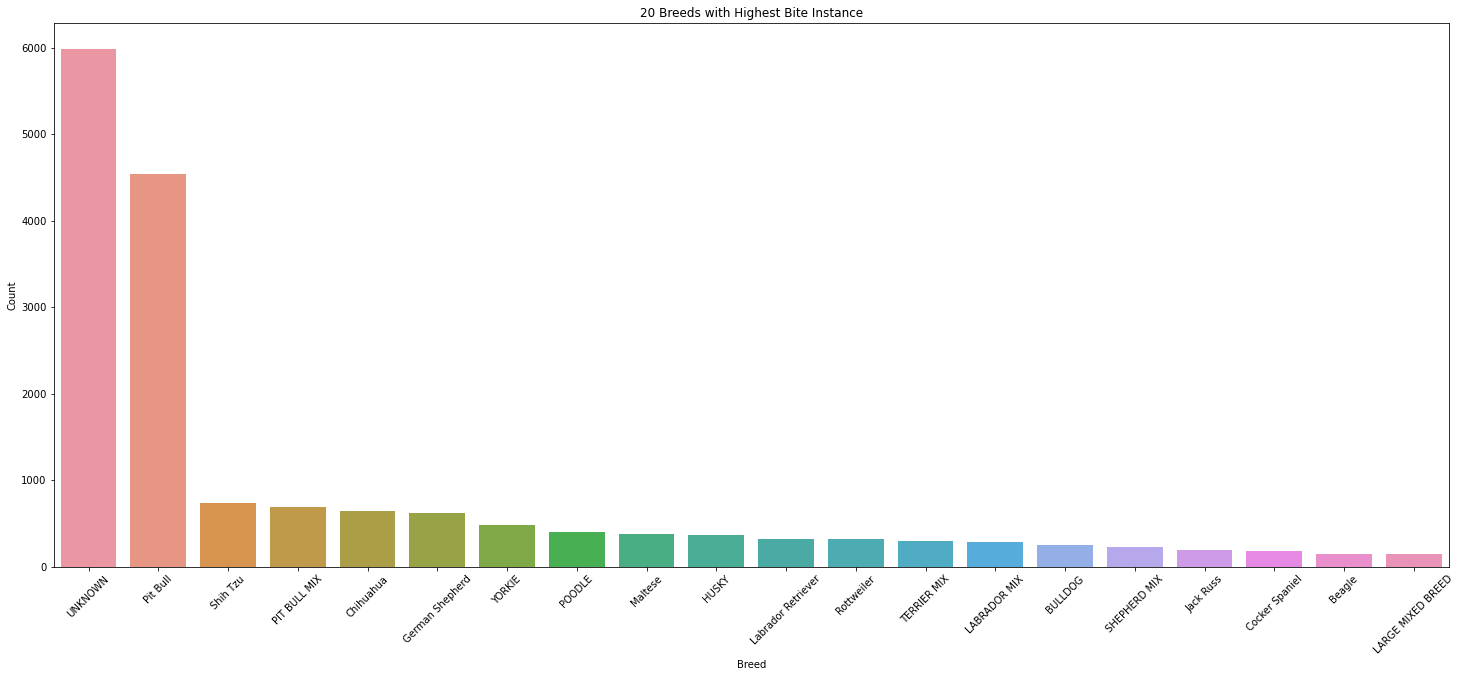

In [20]:
#find 20 most occurring breeds
top_breeds = data['Breed'].value_counts().head(20).index

#count plot
plt.figure(figsize=(25, 10))
sns.countplot(x='Breed', data=data[data['Breed'].isin(top_breeds)], order=top_breeds)
plt.title('20 Breeds with Highest Bite Instance')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
#convert 'DateOfBite' to datetime format
data['DateOfBite'] = pd.to_datetime(data['DateOfBite'], format='%B %d %Y')

#separating date by month, year
data['MonthYear'] = data['DateOfBite'].dt.to_period('M')

#separating data by year
data['Year'] = data['DateOfBite'].dt.year

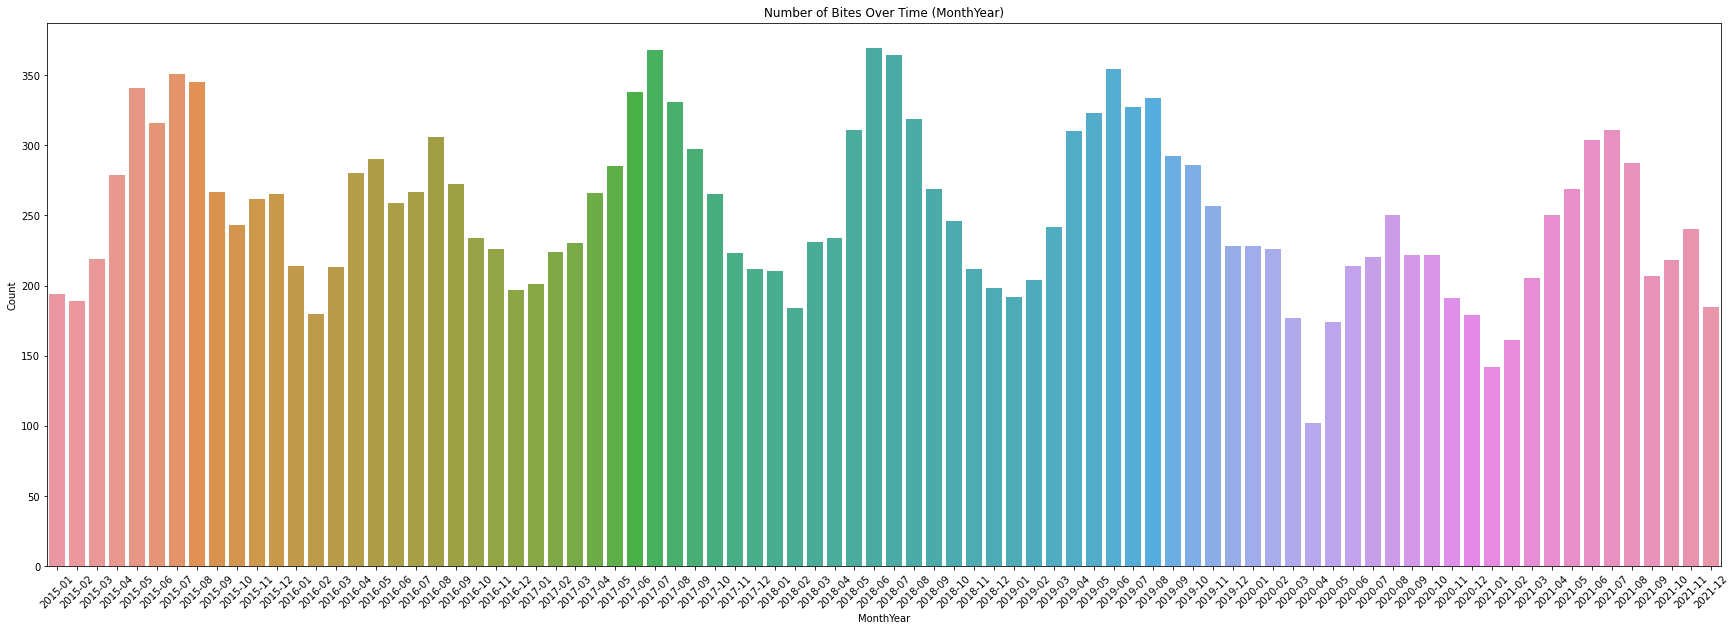

In [22]:
# Time series plot for 'MonthYear'
plt.figure(figsize=(30, 10))
sns.countplot(x='MonthYear', data=data.sort_values('DateOfBite'))
plt.title('Number of Bites Over Time (MonthYear)')
plt.xlabel('MonthYear')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

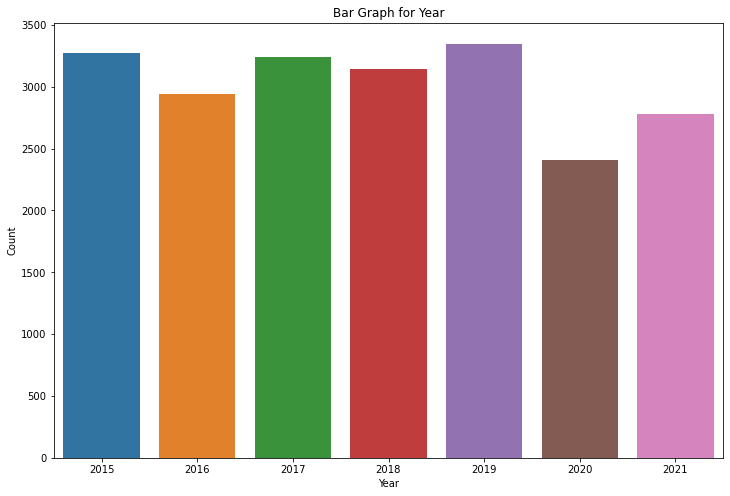

In [23]:
#bar graph for Year
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=data)
plt.title('Bar Graph for Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()